In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
#import tensorflow

#
# plt.rcParams.update({'font.size':200})
#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15) 

%matplotlib inline
%load_ext autoreload
%autoreload  2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Explixit scheme for solving partial differential equations
Want to find a solution to the one-dimensional problem:
\begin{equation}
    \frac{\partial u(x,t)^2}{\partial x^2}= \frac{\partial u(x,t)}{\partial t}\text{,}\ \ t > 0 \text{,}\ \ x \in [0,1].
\end{equation}

With the analytical solution
\begin{equation}
    u(x,t) = e^{-\pi^2 t} sin(\pi x)
\end{equation}

In [2]:
def u_analytical(point):
    x,t = point
    return np.exp(-np.pi**2*t)*np.sin(np.pi*x)

##### Define the parameters and functions

In [34]:
T = 1
Nt = 10
x0 = 0
X = 1

def eval_points(u,u_a,t1,t2):
    fig, axes = plt.subplots(2,figsize=[6,6])
    for ax,t in zip(axes,[t1, t2]):
        ax.set_title('Solution at time {:.3f}'.format(t/u.shape[0]),fontsize=18)
        ax.plot(u[t,:],label='Numerical')
        ax.plot(u_a[t,:],label='Analytical')
        ax.set_xlabel('x',fontsize=17)
        ax.set_ylabel('u(x,t)',fontsize=17)
        ax.legend()
        ax.set_ylim([0,1.1*np.max(u_a[t])])

    
def euler(dx,Nx,T, plot=False, save=''):
    x = np.linspace(x0, X, Nx)
    #dt = np.min([1/(Nx - 1), dx**2/2])
    dt = dx**2/2
    Nt = int(T/dt) + 1
    t = np.linspace(0,  T,  Nt)
    
    r = dt/dx**2
    factor = (1-2*r)
    
    u = np.zeros((Nt,Nx))
    u[0] = np.sin(np.pi*x)
    u_a = np.zeros((Nt,Nx))
    u_a[0] = np.sin(np.pi*x)
    for j,t_ in enumerate(t):
        if j == 0:
            continue
        for i in range(1,Nx-1):
            u[j,i] = r * (u[j-1,i+1] + u[j-1,i-1]) + factor*u[j-1,i]
        u_a[j] = u_analytical((x,t_))
    print('MSE: ',np.mean((u - u_a)**2))
    
    if plot:
        N=u[::Nx,1:-1].T.shape[1]-1
        plt.figure(figsize = [7,5])
        m = plt.imshow(u[::Nx,1:-1].T,norm = matplotlib.colors.LogNorm())
        plt.colorbar(m)
        #plt.suptitle(r'$\Delta x = $'+'1/'+str(Nx),fontsize=18)
        plt.title('Numerical',fontsize=18)
        plt.xlabel('Time (t)',fontsize=16)
        plt.ylabel('x',fontsize=16)
        plt.xticks(np.linspace(0, N,5), (0,0.25,0.5,0.75,1.0))
        if save != '':
            plt.savefig(save+'_num.pdf')
        plt.figure(figsize = [7,5])
        m = plt.imshow(u_a[::Nx,1:-1].T,norm = matplotlib.colors.LogNorm())
        plt.colorbar(m)
        plt.title('Analytical',fontsize=18)
        plt.xlabel('Time (t)',fontsize=16) 
        plt.ylabel('x',fontsize=16)
        if save != '':
            plt.savefig(save+'_anal.pdf')
        plt.figure(figsize = [7,5])
        m = plt.imshow(np.abs(((u - u_a)/u)[::Nx,1:-1].T))
        plt.colorbar(m)
        plt.title('Relative error',fontsize=18)
        plt.xlabel('Time (t)',fontsize=16)
        plt.ylabel('x',fontsize=16)
        plt.xticks(np.linspace(0, N,5), (0,0.25,0.5,0.75,1.0))
        if save != '':
            plt.savefig(save+'_rel_error.pdf')
        t_1 = int(Nx**2/100)
        t_2 = Nt-int(Nx**2/100)
        eval_points(u,u_a,t_1,t_2)
        plt.tight_layout()
        if save != '':
            plt.savefig(save+'points.pdf')
        plt.show()
    return u, u_a

### Using forward euler method
Where for stability, it is required that:

$\frac{\Delta t}{\Delta x^2} \geq \frac{1}{2}$

=> $\Delta t \geq \frac{\Delta x^2}{2}$

###### Plot the results
Calculate the numerical solution for $\Delta x = \frac{1}{10}$, and plot it along with the analytical solution to comparison.

MSE:  0.000518379828060839
5.502308068265453e-13


/Users/heine2307/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:64: RuntimeWarning: divide by zero encountered in true_divide
/Users/heine2307/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:64: RuntimeWarning: invalid value encountered in true_divide


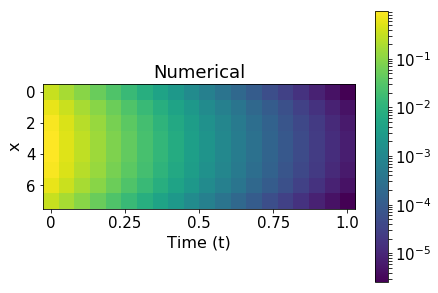

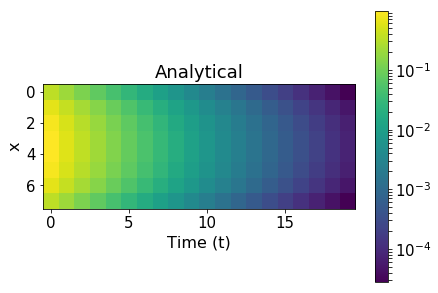

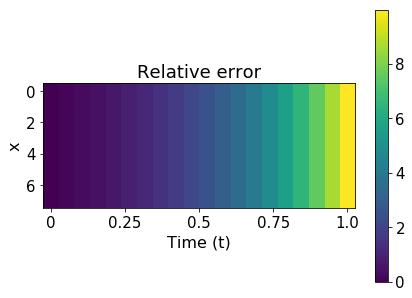

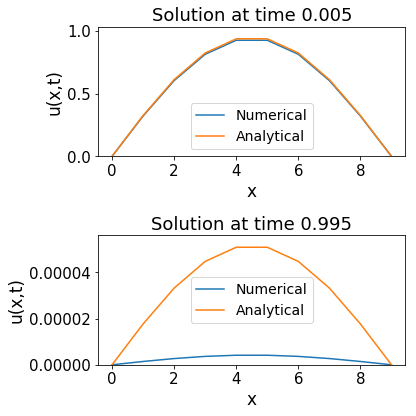

In [35]:
Nx = 10
dx = 1/Nx

u1,a1 = euler(dx,Nx,T, plot=True, save='dx_10')

Calculate the numerical solution for $\Delta x = \frac{1}{100}$, and plot it along with the analytical solution to comparison.

MSE:  5.098701759176404e-06
8.011465807855966e-08


/Users/heine2307/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:64: RuntimeWarning: divide by zero encountered in true_divide
/Users/heine2307/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:64: RuntimeWarning: invalid value encountered in true_divide


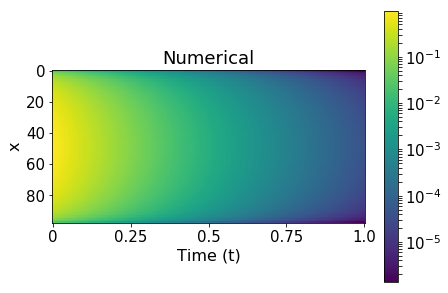

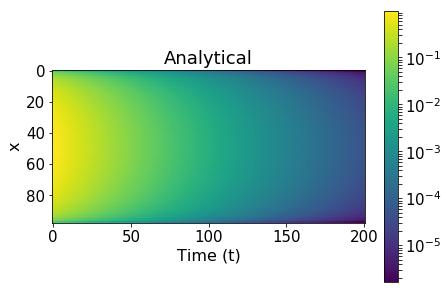

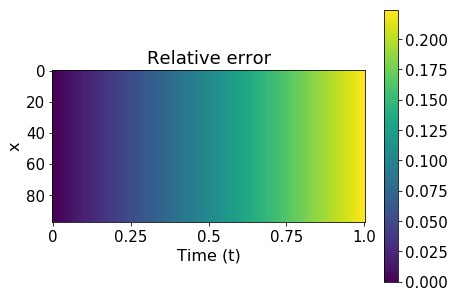

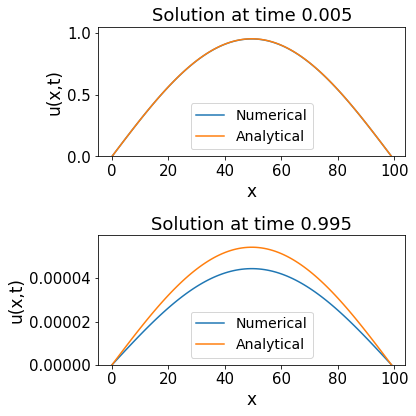

In [36]:
Nx = 100
dx = 1/Nx

u2,a2 = euler(dx,Nx,T,plot=True, save='dx_100')

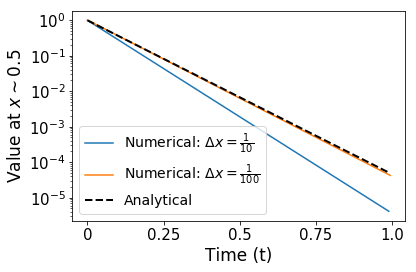

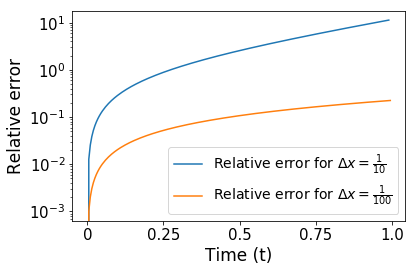

In [37]:
mid1 = int(u1.shape[1]/2)
mid2 = int(u2.shape[1]/2)
plt.rcParams.update({"font.size":14})
u1_norm = u1[::,mid1]
u2_norm = u2[::100,mid2]
a2_norm = a2[::100,mid2]
a1_norm = a1[::,mid1]
plt.figure()
plt.semilogy(u1_norm,'-',label=r'Numerical: $\Delta x=\frac{1}{10}$')
plt.semilogy(u2_norm,'-',label=r'Numerical: $\Delta x=\frac{1}{100}$')
plt.semilogy(a1_norm,'k--',label='Analytical',linewidth=2)
plt.xticks(np.linspace(0, u2[::100,mid2].shape[0],5), (0,0.25,0.5,0.75,1.0))
plt.xlabel('Time (t)',fontsize=17) 
plt.ylabel(r'Value at $x \sim 0.5$',fontsize=17)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('normalized_solutions.pdf')
plt.figure()
plt.semilogy(np.abs((u1_norm-a1_norm)/u1_norm),'-',label=r'Relative error for $\Delta x=\frac{1}{10}$')
plt.semilogy(np.abs((u2_norm-a2_norm)/u2_norm),'-',label=r'Relative error for $\Delta x=\frac{1}{100}$')
plt.xticks(np.linspace(0, u2[::100,mid2].shape[0],5), (0,0.25,0.5,0.75,1.0))
plt.legend(fontsize=14)
plt.xlabel('Time (t)',fontsize=17)
plt.ylabel('Relative error',fontsize=17)
plt.tight_layout()
plt.savefig('rel_error.pdf')
plt.show()